In [6]:
# Previous directory
# C:\Users\snuga\OneDrive\Documents\USF\Research\MIMIC_IV\

In [7]:
# ==============================================================================
# ||                                                                         ||
# ||                 MIMIC_IV_BERT_Pytorch-Classification                    ||
# ||                                                                         ||
# ==============================================================================
# ||                                                                         ||
# ||                  Author: Jessica Elrefaei                               ||
# ||                  Co-Authors: Kevin Hitt,                                ||
# ||                              Sai Charan Dasari,                         ||
# ||                              Yaswanth Chandolu                          ||
# ||                  Date:   2023-10-29                                     ||
# ||                                                                         ||
# ==============================================================================
#
#  This notebook contains an implementation of a classification model using the
#  BERT (Bidirectional Encoder Representations from Transformers) architecture
#  and PyTorch framework.
#  Using the MIMIC-IV (Medical Information Mart for Intensive Care IV) dataset

In [8]:
# -----------------------------------------------------------------------------------------
#                                         Requirements
# -----------------------------------------------------------------------------------------
# - Python 3.x
# - PyTorch
# - Transformers Library
# - Pandas
# - NumPy


In [9]:
pip install transformers datasets tokenizers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 69.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 493.7/493.7 kB 49.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.8/3.8 MB 117.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 311.2/311.2 kB 41.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 91.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.3/115.3 kB 18.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [10]:
import os
from pathlib import Path
import torch
import re
import random
import transformers, datasets
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer
import tqdm
from torch.utils.data import Dataset, DataLoader
import itertools
import math
import torch.nn.functional as F
import numpy as np
from torch.optim import Adam

In [11]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import re
import random
import pandas as pd
import gzip

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import numpy as np
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Part 1: Data Preprocessing

In [12]:
with gzip.open(r"admissions.csv.gz", 'rb') as file:
    admissionsdf = pd.read_csv(file)

admissionsdf

subject_id   hadm_id            admittime            dischtime  \
0         10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
1         10000032  22841357  2180-06-26 18:27:00  2180-06-27 18:49:00   
2         10000032  25742920  2180-08-05 23:44:00  2180-08-07 17:50:00   
3         10000032  29079034  2180-07-23 12:35:00  2180-07-25 17:55:00   
4         10000068  25022803  2160-03-03 23:16:00  2160-03-04 06:26:00   
...            ...       ...                  ...                  ...   
431226    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   
431227    19999828  29734428  2147-07-18 16:23:00  2147-08-04 18:10:00   
431228    19999840  21033226  2164-09-10 13:47:00  2164-09-17 13:42:00   
431229    19999840  26071774  2164-07-25 00:27:00  2164-07-28 12:15:00   
431230    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   

                  deathtime  admission_type admit_provider_id  \
0                       NaN          URGENT            P874LG   
1                       NaN        EW EMER.            P09Q6Y   
2                       NaN        EW EMER.            P60CC5   
3                       NaN        EW EMER.            P30KEH   
4                       NaN  EU OBSERVATION            P51VDL   
...                     ...             ...               ...   
431226                  NaN        EW EMER.            P75BG6   
431227                  NaN        EW EMER.            P16C7J   
431228  2164-09-17 13:42:00        EW EMER.            P58A9J   
431229                  NaN        EW EMER.            P506DE   
431230                  NaN        EW EMER.            P09IS0   

            admission_location discharge_location insurance language  \
0       TRANSFER FROM HOSPITAL               HOME     Other  ENGLISH   
1               EMERGENCY ROOM               HOME  Medicaid  ENGLISH   
2               EMERGENCY ROOM            HOSPICE  Medicaid  ENGLISH   
3               EMERGENCY ROOM               HOME  Medicaid  ENGLISH   
4               EMERGENCY ROOM                NaN     Other  ENGLISH   
...                        ...                ...       ...      ...   
431226  TRANSFER FROM HOSPITAL   HOME HEALTH CARE     Other  ENGLISH   
431227      PHYSICIAN REFERRAL   HOME HEALTH CARE     Other  ENGLISH   
431228          EMERGENCY ROOM               DIED     Other  ENGLISH   
431229          EMERGENCY ROOM               HOME     Other  ENGLISH   
431230          EMERGENCY ROOM              REHAB     Other  ENGLISH   

       marital_status     race            edregtime            edouttime  \
0             WIDOWED    WHITE  2180-05-06 19:17:00  2180-05-06 23:30:00   
1             WIDOWED    WHITE  2180-06-26 15:54:00  2180-06-26 21:31:00   
2             WIDOWED    WHITE  2180-08-05 20:58:00  2180-08-06 01:44:00   
3             WIDOWED    WHITE  2180-07-23 05:54:00  2180-07-23 14:00:00   
4              SINGLE    WHITE  2160-03-03 21:55:00  2160-03-04 06:26:00   
...               ...      ...                  ...                  ...   
431226         SINGLE    WHITE  2149-01-08 09:11:00  2149-01-08 18:12:00   
431227         SINGLE    WHITE  2147-07-17 17:18:00  2147-07-18 17:34:00   
431228        WIDOWED    WHITE  2164-09-10 11:09:00  2164-09-10 14:46:00   
431229        WIDOWED    WHITE  2164-07-24 21:16:00  2164-07-25 01:20:00   
431230            NaN  UNKNOWN  2145-11-02 19:28:00  2145-11-02 22:59:00   

        hospital_expire_flag  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
431226                     0  
431227                     0  
431228                     1  
431229                     0  
431230                     0  

[431231 rows x 16 columns]

In [13]:
with gzip.open(r"diagnoses_icd.csv.gz", 'rb') as file:
    diagnosesdf = pd.read_csv(file)

diagnosesdf

subject_id   hadm_id  seq_num icd_code  icd_version
0          10000032  22595853        1     5723            9
1          10000032  22595853        2    78959            9
2          10000032  22595853        3     5715            9
3          10000032  22595853        4    07070            9
4          10000032  22595853        5      496            9
...             ...       ...      ...      ...          ...
4756321    19999987  23865745        7    41401            9
4756322    19999987  23865745        8    78039            9
4756323    19999987  23865745        9     0413            9
4756324    19999987  23865745       10    36846            9
4756325    19999987  23865745       11     7810            9

[4756326 rows x 5 columns]

In [14]:
diagnosesdf.tail(20)

subject_id   hadm_id  seq_num icd_code  icd_version
4756306    19999840  21033226       11     9331            9
4756307    19999840  21033226       12     E912            9
4756308    19999840  26071774        1    43491            9
4756309    19999840  26071774        2    43820            9
4756310    19999840  26071774        3    34590            9
4756311    19999840  26071774        4    43811            9
4756312    19999840  26071774        5     4019            9
4756313    19999840  26071774        6     2724            9
4756314    19999840  26071774        7     3051            9
4756315    19999987  23865745        1      431            9
4756316    19999987  23865745        2     3485            9
4756317    19999987  23865745        3    20280            9
4756318    19999987  23865745        4     5849            9
4756319    19999987  23865745        5     5990            9
4756320    19999987  23865745        6     2449            9
4756321    19999987  23865745        7    41401            9
4756322    19999987  23865745        8    78039            9
4756323    19999987  23865745        9     0413            9
4756324    19999987  23865745       10    36846            9
4756325    19999987  23865745       11     7810            9

In [15]:
with gzip.open(r"d_icd_diagnoses.csv.gz", 'rb') as file:
    diagnosisdescriptionsdf = pd.read_csv(file)

diagnosisdescriptionsdf

icd_code  icd_version  \
0          0010            9   
1          0011            9   
2          0019            9   
3          0020            9   
4          0021            9   
...         ...          ...   
109770     Z992           10   
109771     Z993           10   
109772     Z998           10   
109773    Z9981           10   
109774    Z9989           10   

                                               long_title  
0                          Cholera due to vibrio cholerae  
1                   Cholera due to vibrio cholerae el tor  
2                                    Cholera, unspecified  
3                                           Typhoid fever  
4                                     Paratyphoid fever A  
...                                                   ...  
109770                       Dependence on renal dialysis  
109771                           Dependence on wheelchair  
109772  Dependence on other enabling machines and devices  
109773                  Dependence on supplemental oxygen  
109774  Dependence on other enabling machines and devices  

[109775 rows x 3 columns]

#### INNER merge
rows with matching subject_id & hadm_id in both admissionsdf and diagnosesdf

In [16]:
joineddataset=pd.merge(admissionsdf, diagnosesdf, on=['subject_id', 'hadm_id'])
joineddataset

subject_id   hadm_id            admittime            dischtime  \
0          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
1          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
2          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
3          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
4          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
...             ...       ...                  ...                  ...   
4756321    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756322    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756323    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756324    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756325    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   

        deathtime admission_type admit_provider_id      admission_location  \
0             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
1             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
2             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
3             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
4             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
...           ...            ...               ...                     ...   
4756321       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756322       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756323       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756324       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756325       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   

        discharge_location insurance language marital_status     race  \
0                     HOME     Other  ENGLISH        WIDOWED    WHITE   
1                     HOME     Other  ENGLISH        WIDOWED    WHITE   
2                     HOME     Other  ENGLISH        WIDOWED    WHITE   
3                     HOME     Other  ENGLISH        WIDOWED    WHITE   
4                     HOME     Other  ENGLISH        WIDOWED    WHITE   
...                    ...       ...      ...            ...      ...   
4756321              REHAB     Other  ENGLISH            NaN  UNKNOWN   
4756322              REHAB     Other  ENGLISH            NaN  UNKNOWN   
4756323              REHAB     Other  ENGLISH            NaN  UNKNOWN   
4756324              REHAB     Other  ENGLISH            NaN  UNKNOWN   
4756325              REHAB     Other  ENGLISH            NaN  UNKNOWN   

                   edregtime            edouttime  hospital_expire_flag  \
0        2180-05-06 19:17:00  2180-05-06 23:30:00                     0   
1        2180-05-06 19:17:00  2180-05-06 23:30:00                     0   
2        2180-05-06 19:17:00  2180-05-06 23:30:00                     0   
3        2180-05-06 19:17:00  2180-05-06 23:30:00                     0   
4        2180-05-06 19:17:00  2180-05-06 23:30:00                     0   
...                      ...                  ...                   ...   
4756321  2145-11-02 19:28:00  2145-11-02 22:59:00                     0   
4756322  2145-11-02 19:28:00  2145-11-02 22:59:00                     0   
4756323  2145-11-02 19:28:00  2145-11-02 22:59:00                     0   
4756324  2145-11-02 19:28:00  2145-11-02 22:59:00                     0   
4756325  2145-11-02 19:28:00  2145-11-02 22:59:00                     0   

         seq_num icd_code  icd_version  
0              1     5723            9  
1              2    78959            9  
2              3     5715            9  
3              4    07070            9  
4              5      496            9  
...          ...      ...          ...  
4756321        7    41401            9  
4756322        8    78039            9  
4756323        9     041

In [17]:
with gzip.open(r"patients.csv.gz", 'rb') as file:
    patientsdf = pd.read_csv(file)

patientsdf

subject_id gender  anchor_age  anchor_year anchor_year_group  \
0         10000032      F          52         2180       2014 - 2016   
1         10000048      F          23         2126       2008 - 2010   
2         10000068      F          19         2160       2008 - 2010   
3         10000084      M          72         2160       2017 - 2019   
4         10000102      F          27         2136       2008 - 2010   
...            ...    ...         ...          ...               ...   
299707    19999828      F          46         2147       2017 - 2019   
299708    19999829      F          28         2186       2008 - 2010   
299709    19999840      M          58         2164       2008 - 2010   
299710    19999914      F          49         2158       2017 - 2019   
299711    19999987      F          57         2145       2011 - 2013   

               dod  
0       2180-09-09  
1              NaN  
2              NaN  
3       2161-02-13  
4              NaN  
...            ...  
299707         NaN  
299708         NaN  
299709  2164-09-17  
299710         NaN  
299711         NaN  

[299712 rows x 6 columns]

#### LEFT OUTER merge
Columns from patientsdf that are not in joineddataset are added.
Rows from patientsdf that do not have a matching subject_id in joineddataset are not included.

In [18]:
joineddataset2 = pd.merge(joineddataset,patientsdf[['subject_id','anchor_age', 'gender']], on='subject_id', how='left')
joineddataset2

subject_id   hadm_id            admittime            dischtime  \
0          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
1          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
2          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
3          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
4          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
...             ...       ...                  ...                  ...   
4756321    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756322    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756323    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756324    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756325    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   

        deathtime admission_type admit_provider_id      admission_location  \
0             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
1             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
2             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
3             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
4             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
...           ...            ...               ...                     ...   
4756321       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756322       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756323       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756324       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756325       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   

        discharge_location insurance  ... marital_status     race  \
0                     HOME     Other  ...        WIDOWED    WHITE   
1                     HOME     Other  ...        WIDOWED    WHITE   
2                     HOME     Other  ...        WIDOWED    WHITE   
3                     HOME     Other  ...        WIDOWED    WHITE   
4                     HOME     Other  ...        WIDOWED    WHITE   
...                    ...       ...  ...            ...      ...   
4756321              REHAB     Other  ...            NaN  UNKNOWN   
4756322              REHAB     Other  ...            NaN  UNKNOWN   
4756323              REHAB     Other  ...            NaN  UNKNOWN   
4756324              REHAB     Other  ...            NaN  UNKNOWN   
4756325              REHAB     Other  ...            NaN  UNKNOWN   

                   edregtime            edouttime hospital_expire_flag  \
0        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
1        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
2        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
3        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
4        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
...                      ...                  ...                  ...   
4756321  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756322  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756323  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756324  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756325  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   

         seq_num  icd_code icd_version  anchor_age  gender  
0              1      5723           9          52       F  
1              2     78959           9          52       F  
2              3      5715           9          52       F  
3              4     07070           9          52       F  
4              5       496           9          52       F  
...          ...       ...         ...         ...     ...  
4756321        7     41401

In [19]:
joinedandsorteddf=joineddataset2.sort_values(by=['subject_id', 'admittime', 'seq_num'], ascending=True)
joinedandsorteddf

subject_id   hadm_id            admittime            dischtime  \
0          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
1          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
2          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
3          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
4          10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00   
...             ...       ...                  ...                  ...   
4756321    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756322    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756323    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756324    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   
4756325    19999987  23865745  2145-11-02 21:38:00  2145-11-11 12:57:00   

        deathtime admission_type admit_provider_id      admission_location  \
0             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
1             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
2             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
3             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
4             NaN         URGENT            P874LG  TRANSFER FROM HOSPITAL   
...           ...            ...               ...                     ...   
4756321       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756322       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756323       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756324       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   
4756325       NaN       EW EMER.            P09IS0          EMERGENCY ROOM   

        discharge_location insurance  ... marital_status     race  \
0                     HOME     Other  ...        WIDOWED    WHITE   
1                     HOME     Other  ...        WIDOWED    WHITE   
2                     HOME     Other  ...        WIDOWED    WHITE   
3                     HOME     Other  ...        WIDOWED    WHITE   
4                     HOME     Other  ...        WIDOWED    WHITE   
...                    ...       ...  ...            ...      ...   
4756321              REHAB     Other  ...            NaN  UNKNOWN   
4756322              REHAB     Other  ...            NaN  UNKNOWN   
4756323              REHAB     Other  ...            NaN  UNKNOWN   
4756324              REHAB     Other  ...            NaN  UNKNOWN   
4756325              REHAB     Other  ...            NaN  UNKNOWN   

                   edregtime            edouttime hospital_expire_flag  \
0        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
1        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
2        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
3        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
4        2180-05-06 19:17:00  2180-05-06 23:30:00                    0   
...                      ...                  ...                  ...   
4756321  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756322  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756323  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756324  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   
4756325  2145-11-02 19:28:00  2145-11-02 22:59:00                    0   

         seq_num  icd_code icd_version  anchor_age  gender  
0              1      5723           9          52       F  
1              2     78959           9          52       F  
2              3      5715           9          52       F  
3              4     07070           9          52       F  
4              5       496           9          52       F  
...          ...       ...         ...         ...     ...  
4756321        7     41401

<Axes: >

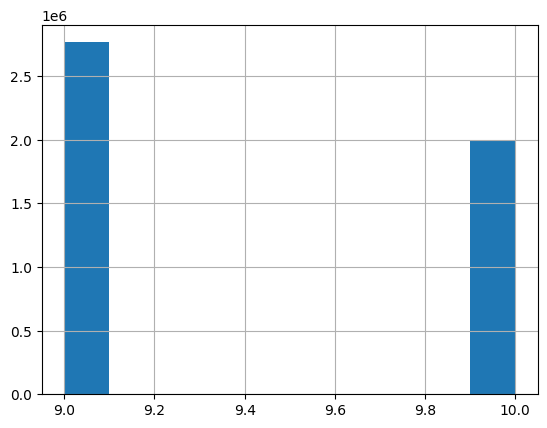

In [20]:
joinedandsorteddf['icd_version'].hist()

#### Filter Based on ICD-10 Code (version 10)

In [21]:
joinedandsorteddf=joinedandsorteddf[joinedandsorteddf["icd_version"]==10]
joinedandsorteddf

subject_id   hadm_id            admittime            dischtime  \
40         10000084  23052089  2160-11-21 01:56:00  2160-11-25 14:52:00   
41         10000084  23052089  2160-11-21 01:56:00  2160-11-25 14:52:00   
42         10000084  23052089  2160-11-21 01:56:00  2160-11-25 14:52:00   
43         10000084  23052089  2160-11-21 01:56:00  2160-11-25 14:52:00   
44         10000084  23052089  2160-11-21 01:56:00  2160-11-25 14:52:00   
...             ...       ...                  ...                  ...   
4756269    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   
4756270    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   
4756271    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   
4756272    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   
4756273    19999828  25744818  2149-01-08 16:44:00  2149-01-18 17:00:00   

        deathtime admission_type admit_provider_id      admission_location  \
40            NaN       EW EMER.            P6957U   WALK-IN/SELF REFERRAL   
41            NaN       EW EMER.            P6957U   WALK-IN/SELF REFERRAL   
42            NaN       EW EMER.            P6957U   WALK-IN/SELF REFERRAL   
43            NaN       EW EMER.            P6957U   WALK-IN/SELF REFERRAL   
44            NaN       EW EMER.            P6957U   WALK-IN/SELF REFERRAL   
...           ...            ...               ...                     ...   
4756269       NaN       EW EMER.            P75BG6  TRANSFER FROM HOSPITAL   
4756270       NaN       EW EMER.            P75BG6  TRANSFER FROM HOSPITAL   
4756271       NaN       EW EMER.            P75BG6  TRANSFER FROM HOSPITAL   
4756272       NaN       EW EMER.            P75BG6  TRANSFER FROM HOSPITAL   
4756273       NaN       EW EMER.            P75BG6  TRANSFER FROM HOSPITAL   

        discharge_location insurance  ... marital_status   race  \
40        HOME HEALTH CARE  Medicare  ...        MARRIED  WHITE   
41        HOME HEALTH CARE  Medicare  ...        MARRIED  WHITE   
42        HOME HEALTH CARE  Medicare  ...        MARRIED  WHITE   
43        HOME HEALTH CARE  Medicare  ...        MARRIED  WHITE   
44        HOME HEALTH CARE  Medicare  ...        MARRIED  WHITE   
...                    ...       ...  ...            ...    ...   
4756269   HOME HEALTH CARE     Other  ...         SINGLE  WHITE   
4756270   HOME HEALTH CARE     Other  ...         SINGLE  WHITE   
4756271   HOME HEALTH CARE     Other  ...         SINGLE  WHITE   
4756272   HOME HEALTH CARE     Other  ...         SINGLE  WHITE   
4756273   HOME HEALTH CARE     Other  ...         SINGLE  WHITE   

                   edregtime            edouttime hospital_expire_flag  \
40       2160-11-20 20:36:00  2160-11-21 03:20:00                    0   
41       2160-11-20 20:36:00  2160-11-21 03:20:00                    0   
42       2160-11-20 20:36:00  2160-11-21 03:20:00                    0   
43       2160-11-20 20:36:00  2160-11-21 03:20:00                    0   
44       2160-11-20 20:36:00  2160-11-21 03:20:00                    0   
...                      ...                  ...                  ...   
4756269  2149-01-08 09:11:00  2149-01-08 18:12:00                    0   
4756270  2149-01-08 09:11:00  2149-01-08 18:12:00                    0   
4756271  2149-01-08 09:11:00  2149-01-08 18:12:00                    0   
4756272  2149-01-08 09:11:00  2149-01-08 18:12:00                    0   
4756273  2149-01-08 09:11:00  2149-01-08 18:12:00                    0   

         seq_num  icd_code icd_version  anchor_age  gender  
40             1     G3183          10          72       M  
41             2     F0280          10          72       M  
42             3      R441          10          72       M  
43             4      R296          10          72       M  
44             5      E785          10          72       M  
...          ...       ...         ...         ...     ...  
4756269       15      F419          10          46

In [22]:
averageage=joinedandsorteddf.groupby('race', as_index=False)['anchor_age'].mean().sort_values(by=['anchor_age'])
averageage

race  anchor_age
17                  HISPANIC/LATINO - MEXICAN   48.819292
29                          WHITE - BRAZILIAN   50.088816
4                              ASIAN - KOREAN   52.022636
14                HISPANIC/LATINO - DOMINICAN   52.263907
19               HISPANIC/LATINO - SALVADORAN   52.396809
15               HISPANIC/LATINO - GUATEMALAN   52.927043
18             HISPANIC/LATINO - PUERTO RICAN   53.913656
16                 HISPANIC/LATINO - HONDURAN   54.049141
6                               BLACK/AFRICAN   54.925305
7                      BLACK/AFRICAN AMERICAN   55.895933
22                                      OTHER   56.393276
1                                       ASIAN   56.644027
2                        ASIAN - ASIAN INDIAN   57.144592
10                         HISPANIC OR LATINO   57.689655
0               AMERICAN INDIAN/ALASKA NATIVE   58.434844
5                    ASIAN - SOUTH EAST ASIAN   58.439946
9                      BLACK/CARIBBEAN ISLAND   58.583199
24                                 PORTUGUESE   59.018344
12                HISPANIC/LATINO - COLUMBIAN   59.576043
11         HISPANIC/LATINO - CENTRAL AMERICAN   59.869937
8                          BLACK/CAPE VERDEAN   59.915912
23                 PATIENT DECLINED TO ANSWER   60.522604
25                             SOUTH AMERICAN   60.570080
26                           UNABLE TO OBTAIN   60.801587
28                                      WHITE   62.293581
21  NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER   62.513447
27                                    UNKNOWN   63.028178
13                    HISPANIC/LATINO - CUBAN   63.067477
31                     WHITE - OTHER EUROPEAN   63.176870
3                             ASIAN - CHINESE   63.520333
30                   WHITE - EASTERN EUROPEAN   64.996055
32                            WHITE - RUSSIAN   75.709867
20                    MULTIPLE RACE/ETHNICITY   85.000000

#### Number of unique ICD-10 Codes

In [23]:
icdcount=joinedandsorteddf.icd_code.nunique()
icdcount

16757

#### Most Frequent ICD-10 Codes

In [24]:
icdgroupcount=joinedandsorteddf.groupby(['icd_code'])['subject_id'].nunique().sort_values(ascending=False)
icdgroupcount=pd.DataFrame(icdgroupcount)
icdgroupcount = icdgroupcount.merge(diagnosisdescriptionsdf, on='icd_code', how='left')

In [25]:
icdgroupcount

icd_code  subject_id  icd_version  \
0          I10       31521           10   
1         E785       27903           10   
2       Z87891       21356           10   
3         K219       19067           10   
4         F329       16476           10   
...        ...         ...          ...   
16787  S67195S           1           10   
16788   I82719           1           10   
16789   I82712           1           10   
16790    N9411           1           10   
16791    M0570           1           10   

                                              long_title  
0                       Essential (primary) hypertension  
1                            Hyperlipidemia, unspecified  
2                Personal history of nicotine dependence  
3      Gastro-esophageal reflux disease without esoph...  
4      Major depressive disorder, single episode, uns...  
...                                                  ...  
16787       Crushing injury of left ring finger, sequela  
16788  Chronic embolism and thrombosis of superficial...  
16789  Chronic embolism and thrombosis of superficial...  
16790                Superficial (introital) dyspareunia  
16791  Rheumatoid arthritis with rheumatoid factor of...  

[16792 rows x 4 columns]

#### Total Number of Patients

In [26]:
patientcount=joinedandsorteddf.subject_id.nunique()
patientcount

80213

#### Deceased Patient Count

In [27]:
deceasedpatientcounts=joinedandsorteddf[joinedandsorteddf["deathtime"].notnull()]["subject_id"].nunique()
deceasedpatientcounts

3360

#### Dataframe just based on Deceased Patients

In [28]:
deceasedpatients=joinedandsorteddf[joinedandsorteddf["deathtime"].notnull()]
deceasedpatients

subject_id   hadm_id            admittime            dischtime  \
750        10001884  26184834  2131-01-07 20:39:00  2131-01-20 05:15:00   
751        10001884  26184834  2131-01-07 20:39:00  2131-01-20 05:15:00   
752        10001884  26184834  2131-01-07 20:39:00  2131-01-20 05:15:00   
753        10001884  26184834  2131-01-07 20:39:00  2131-01-20 05:15:00   
754        10001884  26184834  2131-01-07 20:39:00  2131-01-20 05:15:00   
...             ...       ...                  ...                  ...   
4751631    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751632    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751633    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751634    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751635    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   

                   deathtime               admission_type admit_provider_id  \
750      2131-01-20 05:15:00            OBSERVATION ADMIT            P874LG   
751      2131-01-20 05:15:00            OBSERVATION ADMIT            P874LG   
752      2131-01-20 05:15:00            OBSERVATION ADMIT            P874LG   
753      2131-01-20 05:15:00            OBSERVATION ADMIT            P874LG   
754      2131-01-20 05:15:00            OBSERVATION ADMIT            P874LG   
...                      ...                          ...               ...   
4751631  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751632  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751633  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751634  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751635  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   

         admission_location discharge_location insurance  ... marital_status  \
750          EMERGENCY ROOM               DIED  Medicare  ...        MARRIED   
751          EMERGENCY ROOM               DIED  Medicare  ...        MARRIED   
752          EMERGENCY ROOM               DIED  Medicare  ...        MARRIED   
753          EMERGENCY ROOM               DIED  Medicare  ...        MARRIED   
754          EMERGENCY ROOM               DIED  Medicare  ...        MARRIED   
...                     ...                ...       ...  ...            ...   
4751631  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751632  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751633  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751634  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751635  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   

                           race            edregtime            edouttime  \
750      BLACK/AFRICAN AMERICAN  2131-01-07 13:36:00  2131-01-07 22:13:00   
751      BLACK/AFRICAN AMERICAN  2131-01-07 13:36:00  2131-01-07 22:13:00   
752      BLACK/AFRICAN AMERICAN  2131-01-07 13:36:00  2131-01-07 22:13:00   
753      BLACK/AFRICAN AMERICAN  2131-01-07 13:36:00  2131-01-07 22:13:00   
754      BLACK/AFRICAN AMERICAN  2131-01-07 13:36:00  2131-01-07 22:13:00   
...                         ...                  ...                  ...   
4751631                   WHITE                  NaN                  NaN   
4751632                   WHITE                  NaN                  NaN   
4751633                   WHITE                  NaN                  NaN   
4751634                   WHITE                  NaN                  NaN   
4751635                   WHITE                  NaN                  NaN   

        hospital_expire_flag  seq_num  icd_code icd_version  anchor_age  \
750                        1        1      J441          10          68   
751                        1        2     K7200          10          68   
752                        1        3      R579 

#### List of Deceased Patients

In [29]:
arrayofdeceasedpatients=deceasedpatients["subject_id"].unique().copy()
listofdeceasedpatients=arrayofdeceasedpatients.tolist()
listofdeceasedpatients

[10001884,
 10003400,
 10004720,
 10005817,
 10007818,
 10010058,
 10010471,
 10011365,
 10015931,
 10021927,
 10023117,
 10024982,
 10026879,
 10032409,
 10035631,
 10037861,
 10038688,
 10046679,
 10047172,
 10050445,
 10050755,
 10055344,
 10055694,
 10059406,
 10064049,
 10067389,
 10069692,
 10071869,
 10073239,
 10076958,
 10078805,
 10079545,
 10080695,
 10082662,
 10097659,
 10106165,
 10113636,
 10115044,
 10118141,
 10119017,
 10119992,
 10131638,
 10132611,
 10133363,
 10133599,
 10134367,
 10135376,
 10142197,
 10144378,
 10152346,
 10155871,
 10157542,
 10162760,
 10168722,
 10177348,
 10179383,
 10179842,
 10183369,
 10184327,
 10187075,
 10192651,
 10197095,
 10201643,
 10206125,
 10207354,
 10213338,
 10236222,
 10236280,
 10236942,
 10237748,
 10239650,
 10240102,
 10246238,
 10249699,
 10250007,
 10252642,
 10257550,
 10260379,
 10261293,
 10263326,
 10269234,
 10272082,
 10272169,
 10274368,
 10284297,
 10289851,
 10291949,
 10292730,
 10295734,
 10300273,
 10302157,

In [30]:
#See if it Checks out

len(listofdeceasedpatients)

#yes

3360

#### Filter original dataframe based on the deceased patients list

In [31]:
joinedandsorteddf2=joinedandsorteddf[joinedandsorteddf['subject_id'].isin(listofdeceasedpatients)]
joinedandsorteddf2

subject_id   hadm_id            admittime            dischtime  \
819        10001884  27016754  2130-06-23 22:14:00  2130-06-24 11:07:00   
821        10001884  27016754  2130-06-23 22:14:00  2130-06-24 11:07:00   
823        10001884  27016754  2130-06-23 22:14:00  2130-06-24 11:07:00   
786        10001884  26202981  2130-08-21 15:26:00  2130-08-23 16:40:00   
787        10001884  26202981  2130-08-21 15:26:00  2130-08-23 16:40:00   
...             ...       ...                  ...                  ...   
4751631    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751632    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751633    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751634    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   
4751635    19990427  29695607  2182-01-04 00:00:00  2182-01-24 00:00:00   

                   deathtime               admission_type admit_provider_id  \
819                      NaN               EU OBSERVATION            P21E4S   
821                      NaN               EU OBSERVATION            P21E4S   
823                      NaN               EU OBSERVATION            P21E4S   
786                      NaN                     EW EMER.            P20301   
787                      NaN                     EW EMER.            P20301   
...                      ...                          ...               ...   
4751631  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751632  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751633  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751634  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   
4751635  2182-01-24 23:15:00  SURGICAL SAME DAY ADMISSION            P39FGY   

         admission_location discharge_location insurance  ... marital_status  \
819          EMERGENCY ROOM                NaN  Medicare  ...        MARRIED   
821          EMERGENCY ROOM                NaN  Medicare  ...        MARRIED   
823          EMERGENCY ROOM                NaN  Medicare  ...        MARRIED   
786          EMERGENCY ROOM               HOME  Medicare  ...        MARRIED   
787          EMERGENCY ROOM               HOME  Medicare  ...        MARRIED   
...                     ...                ...       ...  ...            ...   
4751631  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751632  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751633  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751634  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   
4751635  PHYSICIAN REFERRAL               DIED  Medicare  ...        MARRIED   

                           race            edregtime            edouttime  \
819      BLACK/AFRICAN AMERICAN  2130-06-23 17:42:00  2130-06-24 11:07:00   
821      BLACK/AFRICAN AMERICAN  2130-06-23 17:42:00  2130-06-24 11:07:00   
823      BLACK/AFRICAN AMERICAN  2130-06-23 17:42:00  2130-06-24 11:07:00   
786      BLACK/AFRICAN AMERICAN  2130-08-21 12:14:00  2130-08-21 16:51:00   
787      BLACK/AFRICAN AMERICAN  2130-08-21 12:14:00  2130-08-21 16:51:00   
...                         ...                  ...                  ...   
4751631                   WHITE                  NaN                  NaN   
4751632                   WHITE                  NaN                  NaN   
4751633                   WHITE                  NaN                  NaN   
4751634                   WHITE                  NaN                  NaN   
4751635                   WHITE                  NaN                  NaN   

        hospital_expire_flag  seq_num  icd_code icd_version  anchor_age  \
819                        0        1      J441          10          68   
821                        0        2    F17210          10          68   
823                        0        3      R079 

#### Group the DataFrame by 'subject_id' and 'admittime' & get list of ICD codes as a list for each group üî•

In [32]:
#groupedlist=joinedandsorteddf2.groupby(["subject_id", "admittime"], as_index=False)["icd_code"].apply(list)
# below (uses 'agg' function instead of `.apply(list)` to avoid error on KH's machine)

groupedlist = joinedandsorteddf2.groupby(["subject_id", "admittime"]).agg({'icd_code': list}).reset_index()
groupedlist

subject_id            admittime  \
0       10001884  2130-06-23 22:14:00   
1       10001884  2130-08-21 15:26:00   
2       10001884  2130-10-05 20:04:00   
3       10001884  2130-10-08 19:03:00   
4       10001884  2130-10-14 00:58:00   
...          ...                  ...   
8549    19984052  2184-11-22 17:00:00   
8550    19984875  2118-01-05 00:18:00   
8551    19984875  2118-02-04 19:36:00   
8552    19984875  2118-04-18 21:31:00   
8553    19990427  2182-01-04 00:00:00   

                                               icd_code  
0                                  [J441, F17210, R079]  
1     [K921, D62, I4891, J449, I10, F17210, D649, I2...  
2     [J441, R0902, E876, I10, E780, E785, Z87891, Z...  
3     [I4891, J441, Z9981, Z7901, I10, E785, F419, I...  
4              [J441, Z9981, I10, I4891, Z7901, Z87891]  
...                                                 ...  
8549  [I82412, N179, I498, Z951, I469, I82442, I10, ...  
8550  [C7931, G936, G9340, Z85118, F419, D509, Z902,...  
8551  [C7931, G936, G9349, G8191, G40109, R64, Z6826...  
8552  [C7931, G936, J9691, R4701, Z515, C3491, G8191...  
8553  [M47816, J80, J690, A4181, R6521, I82492, K567...  

[8554 rows x 3 columns]

In [33]:
#drop admittime
groupedlist = groupedlist.drop(columns=['admittime']).copy()
groupedlist

subject_id                                           icd_code
0       10001884                               [J441, F17210, R079]
1       10001884  [K921, D62, I4891, J449, I10, F17210, D649, I2...
2       10001884  [J441, R0902, E876, I10, E780, E785, Z87891, Z...
3       10001884  [I4891, J441, Z9981, Z7901, I10, E785, F419, I...
4       10001884           [J441, Z9981, I10, I4891, Z7901, Z87891]
...          ...                                                ...
8549    19984052  [I82412, N179, I498, Z951, I469, I82442, I10, ...
8550    19984875  [C7931, G936, G9340, Z85118, F419, D509, Z902,...
8551    19984875  [C7931, G936, G9349, G8191, G40109, R64, Z6826...
8552    19984875  [C7931, G936, J9691, R4701, Z515, C3491, G8191...
8553    19990427  [M47816, J80, J690, A4181, R6521, I82492, K567...

[8554 rows x 2 columns]

In [34]:
#Convert to string

groupedlist['icd_code'] = groupedlist['icd_code'].astype(str)
groupedlist

subject_id                                           icd_code
0       10001884                         ['J441', 'F17210', 'R079']
1       10001884  ['K921', 'D62', 'I4891', 'J449', 'I10', 'F1721...
2       10001884  ['J441', 'R0902', 'E876', 'I10', 'E780', 'E785...
3       10001884  ['I4891', 'J441', 'Z9981', 'Z7901', 'I10', 'E7...
4       10001884  ['J441', 'Z9981', 'I10', 'I4891', 'Z7901', 'Z8...
...          ...                                                ...
8549    19984052  ['I82412', 'N179', 'I498', 'Z951', 'I469', 'I8...
8550    19984875  ['C7931', 'G936', 'G9340', 'Z85118', 'F419', '...
8551    19984875  ['C7931', 'G936', 'G9349', 'G8191', 'G40109', ...
8552    19984875  ['C7931', 'G936', 'J9691', 'R4701', 'Z515', 'C...
8553    19990427  ['M47816', 'J80', 'J690', 'A4181', 'R6521', 'I...

[8554 rows x 2 columns]

#### Filter for only partients with CARDIAC ARREST IN FINAL SEQUENCE (cause of death)

In [35]:
newgroupedlist=groupedlist.drop_duplicates('subject_id',keep='last').\
           assign(Flag=lambda x : x['icd_code'].str.contains('I462|I468|I469').astype(int))



newgroupedlist=newgroupedlist[newgroupedlist['Flag']==1]


arrayofdeceasedcardiacarrestpatients=newgroupedlist["subject_id"].unique().copy()
listofdeceasedcardiacarrestpatients=arrayofdeceasedcardiacarrestpatients.tolist()
print(len(listofdeceasedcardiacarrestpatients))

363


#### targetpatients = all sequences for patients where cardiac arrest was cause of death

In [36]:
targetpatients=groupedlist[groupedlist['subject_id'].isin(listofdeceasedcardiacarrestpatients)]
targetpatients

subject_id                                           icd_code
0       10001884                         ['J441', 'F17210', 'R079']
1       10001884  ['K921', 'D62', 'I4891', 'J449', 'I10', 'F1721...
2       10001884  ['J441', 'R0902', 'E876', 'I10', 'E780', 'E785...
3       10001884  ['I4891', 'J441', 'Z9981', 'Z7901', 'I10', 'E7...
4       10001884  ['J441', 'Z9981', 'I10', 'I4891', 'Z7901', 'Z8...
...          ...                                                ...
8526    19942414  ['I748', 'I5033', 'A419', 'R6521', 'N280', 'N1...
8528    19948220  ['I469', 'R4020', 'J9601', 'J930', 'E872', 'I4...
8548    19984052  ['I2510', 'D696', 'E119', 'E669', 'Z794', 'I10...
8549    19984052  ['I82412', 'N179', 'I498', 'Z951', 'I469', 'I8...
8553    19990427  ['M47816', 'J80', 'J690', 'A4181', 'R6521', 'I...

[807 rows x 2 columns]

#### Aggregate to one row for each subject_id

In [37]:
newtargetpatients = (targetpatients.groupby(['subject_id'])
       .agg({'icd_code': lambda x: ', '.join(x)})
       .reset_index()
)

newtargetpatients

subject_id                                           icd_code
0      10001884  ['J441', 'F17210', 'R079'], ['K921', 'D62', 'I...
1      10010471  ['I4891', 'N186', 'J189', 'Z7682', 'I248', 'J4...
2      10024982  ['I25110', 'Z951', 'I4891', 'J449', 'Z87891', ...
3      10050755  ['I63132', 'J189', 'J690', 'E43', 'N179', 'G92...
4      10067389  ['J690', 'L89153', 'I639', 'N170', 'J9601', 'K...
..          ...                                                ...
358    19940062  ['G935', 'G950', 'I252', 'N400', 'V499XXS', 'Z...
359    19942414  ['I748', 'I5033', 'A419', 'R6521', 'N280', 'N1...
360    19948220  ['I469', 'R4020', 'J9601', 'J930', 'E872', 'I4...
361    19984052  ['I2510', 'D696', 'E119', 'E669', 'Z794', 'I10...
362    19990427  ['M47816', 'J80', 'J690', 'A4181', 'R6521', 'I...

[363 rows x 2 columns]

In [38]:
newtargetpatients=newtargetpatients['icd_code'].values.tolist()
newtargetpatients

["['J441', 'F17210', 'R079'], ['K921', 'D62', 'I4891', 'J449', 'I10', 'F17210', 'D649', 'I2510', 'F419', 'E785', 'I739', 'M47892', 'R0602', 'G4700', 'H409', 'K449', 'K2970', 'Z7982', 'Z7901', 'Z96649'], ['J441', 'R0902', 'E876', 'I10', 'E780', 'E785', 'Z87891', 'Z9981'], ['I4891', 'J441', 'Z9981', 'Z7901', 'I10', 'E785', 'F419', 'I739', 'I2510', 'Z87891', 'D509', 'R079', 'G4700', 'H409'], ['J441', 'Z9981', 'I10', 'I4891', 'Z7901', 'Z87891'], ['J441', 'I4892', 'Z9981', 'I480', 'J45998', 'Z87891', 'I2510', 'Z96649', 'I10', 'E785', 'D509', 'I739', 'F419', 'K5900', 'M1990', 'Z825', 'Z8249', 'Z7901'], ['J441', 'M7989', 'I2510', 'I499', 'I739', 'F419', 'Z87891', 'E876'], ['J441', 'I4892', 'I248', 'J45909', 'Z87891', 'I4891', 'F419', 'G4700', 'E780', 'I2510', 'E876', 'R312', 'I739', 'Z7952', 'Z9981'], ['J441', 'Z9981', 'I4891', 'J45909', 'Z7901', 'I10', 'I2510', 'E785', 'M1990', 'F419', 'I739', 'G4700', 'D649', 'Z96649', 'Z87891'], ['J441', 'J45909', 'H6991', 'F419', 'G4700', 'I4891', 'Z7901'

In [39]:
from ast import literal_eval

example=newtargetpatients

result2=[]
for st in example:

    # Use 'literal_eval' to convert the string representation of a list to an actual list
    # The unpacking operation separates the list into two parts: 'first_grp' containing
    # all but the last element, and 'last' containing the last element
    *first_grp,last=literal_eval(st)

    # if 'first_grp' or 'last' contain a string element, skip
    if any(isinstance(s, str) for s in (first_grp, last)):
        continue

    # Flatten 'first_grp' and join its elements into a single string, separated by spaces
    # Join the elements in 'last' into another string, separated by spaces
    result=[" ".join([e for r in first_grp for e in r]), " ".join(last)]
    result2.append(result)

print(result2)

[['J441 F17210 R079 K921 D62 I4891 J449 I10 F17210 D649 I2510 F419 E785 I739 M47892 R0602 G4700 H409 K449 K2970 Z7982 Z7901 Z96649 J441 R0902 E876 I10 E780 E785 Z87891 Z9981 I4891 J441 Z9981 Z7901 I10 E785 F419 I739 I2510 Z87891 D509 R079 G4700 H409 J441 Z9981 I10 I4891 Z7901 Z87891 J441 I4892 Z9981 I480 J45998 Z87891 I2510 Z96649 I10 E785 D509 I739 F419 K5900 M1990 Z825 Z8249 Z7901 J441 M7989 I2510 I499 I739 F419 Z87891 E876 J441 I4892 I248 J45909 Z87891 I4891 F419 G4700 E780 I2510 E876 R312 I739 Z7952 Z9981 J441 Z9981 I4891 J45909 Z7901 I10 I2510 E785 M1990 F419 I739 G4700 D649 Z96649 Z87891 J441 J45909 H6991 F419 G4700 I4891 Z7901 I10 I2510 D649 E785 Z87891 Z006 J441 N179 Z9981 I4891 D649 I10 E785 G5622 I2510 M1990 Z96649 Z87891 J45909 F419 G4700 R040 I739', 'J441 K7200 R579 J9602 J9601 I442 I82621 I4891 D696 I469 I10 E785 Z7901 M47892 I7389 I2510 Z87891 Z96641 J0190 F419 G4700 R609 D509 R509 M1990 Y92239 Z7952 Z825 Z781 Z515 Z66 Z9981 J45909 I447 M7981 T45515A'], ['I4891 N186 J189 

# Part 2: Model Architecture

In [40]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [41]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    #lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        #read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = result2

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [42]:
MAX_LEN = 250

def filterPair(p):
    return len(p[0]) < MAX_LEN and \
        len(p[1]) < MAX_LEN


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [43]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepareData('eng', 'fra', False)
print(random.choice(pairs))

Reading lines...
Read 140 sentence pairs
Trimmed to 87 sentence pairs
Counting words...
Counted words:
eng 716
fra 733
['G9389 G911 E6601 Z86711 Z86718 Z87891 E780 Z853 Z6836 C710 G936 G911 Z853 Z9011 E6601 Z86711 Z86718 Z87891 R5082 K219 E780 Z6834 Z806', 'R569 G92 G936 I2119 I2699 C715 C50911 Z66 Z982 S0511XA W06XXXA Y92003 R270 R32 R112 F329 F419 E042 Z86718 Z86711 G8929 M549 K219 G250 R159 E7800 I469 Z87891']


## WordPiece tokenizer

In [44]:
### save data as txt file
os.mkdir(r'./data')
text_data = []
file_count = 0

for sample in tqdm.tqdm([x[0] for x in pairs]):
    text_data.append(sample)

    # once we hit the 10K mark, save to file
    if len(text_data) == 10000:
        with open(f'./data/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        text_data = []
        file_count += 1

paths = [str(x) for x in Path('./data').glob('**/*.txt')]

### training own tokenizer
tokenizer = BertWordPieceTokenizer(
    clean_text=True,
    handle_chinese_chars=False,
    strip_accents=False,
    lowercase=True
)

tokenizer.train(
    files=paths,
    vocab_size=30_000,
    min_frequency=5,
    limit_alphabet=1000,
    wordpieces_prefix='##',
    special_tokens=['[PAD]', '[CLS]', '[SEP]', '[MASK]', '[UNK]']
    )

os.mkdir('./bert-it-1')
tokenizer.save_model('./bert-it-1', 'bert-it')
tokenizer = BertTokenizer.from_pretrained('./bert-it-1/bert-it-vocab.txt', local_files_only=True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87/87 [00:00<00:00, 761804.69it/s]
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1925: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


## BERTDataset

In [45]:
class BERTDataset(Dataset):
    def __init__(self, data_pair, tokenizer, seq_len=250):

        self.tokenizer = tokenizer
        self.seq_len = seq_len
        self.corpus_lines = len(data_pair)
        self.lines = data_pair

    def __len__(self):
        return self.corpus_lines

    def __getitem__(self, item):

        # Step 1: get random sentence pair, either negative or positive (saved as is_next_label)
        t1, t2, is_next_label = self.get_sent(item)

        # Step 2: replace random words in sentence with mask / random words
        t1_random, t1_label = self.random_word(t1)
        t2_random, t2_label = self.random_word(t2)

        # Step 3: Adding CLS and SEP tokens to the start and end of sentences
         # Adding PAD token for labels
        t1 = [self.tokenizer.vocab['[CLS]']] + t1_random + [self.tokenizer.vocab['[SEP]']]
        t2 = t2_random + [self.tokenizer.vocab['[SEP]']]
        t1_label = [self.tokenizer.vocab['[PAD]']] + t1_label + [self.tokenizer.vocab['[PAD]']]
        t2_label = t2_label + [self.tokenizer.vocab['[PAD]']]

        # Step 4: combine sentence 1 and 2 as one input
        # adding PAD tokens to make the sentence same length as seq_len
        segment_label = ([1 for _ in range(len(t1))] + [2 for _ in range(len(t2))])[:self.seq_len]
        bert_input = (t1 + t2)[:self.seq_len]
        bert_label = (t1_label + t2_label)[:self.seq_len]
        padding = [self.tokenizer.vocab['[PAD]'] for _ in range(self.seq_len - len(bert_input))]
        bert_input.extend(padding), bert_label.extend(padding), segment_label.extend(padding)

        output = {"bert_input": bert_input,
                  "bert_label": bert_label,
                  "segment_label": segment_label,
                  "is_next": is_next_label}

        return {key: torch.tensor(value) for key, value in output.items()}

    def random_word(self, sentence):
        tokens = sentence.split()
        output_label = []
        output = []

        # 15% of the tokens would be replaced
        for i, token in enumerate(tokens):
            prob = random.random()

            # remove cls and sep token
            token_id = self.tokenizer(token)['input_ids'][1:-1]

            if prob < 0.15:
                prob /= 0.15

                # 80% chance change token to mask token
                if prob < 0.8:
                    for i in range(len(token_id)):
                        output.append(self.tokenizer.vocab['[MASK]'])

                # 10% chance change token to random token
                elif prob < 0.9:
                    for i in range(len(token_id)):
                        output.append(random.randrange(len(self.tokenizer.vocab)))

                # 10% chance change token to current token
                else:
                    output.append(token_id)

                output_label.append(token_id)

            else:
                output.append(token_id)
                for i in range(len(token_id)):
                    output_label.append(0)

        # flattening
        output = list(itertools.chain(*[[x] if not isinstance(x, list) else x for x in output]))
        output_label = list(itertools.chain(*[[x] if not isinstance(x, list) else x for x in output_label]))
        assert len(output) == len(output_label)
        return output, output_label

    def get_sent(self, index):
        '''return random sentence pair'''
        t1, t2 = self.get_corpus_line(index)

        # negative or positive pair, for next sentence prediction
        if random.random() > 0.5:
            return t1, t2, 1
        else:
            return t1, self.get_random_line(), 0

    def get_corpus_line(self, item):
        '''return sentence pair'''
        return self.lines[item][0], self.lines[item][1]

    def get_random_line(self):
        '''return random single sentence'''
        return self.lines[random.randrange(len(self.lines))][1]

In [46]:
train_data = BERTDataset(
   pairs, seq_len=MAX_LEN, tokenizer=tokenizer)
train_loader = DataLoader(
   train_data, batch_size=32, shuffle=True, pin_memory=True)
sample_data = next(iter(train_loader))
print(train_data[random.randrange(len(train_data))])

{'bert_input': tensor([1, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'bert_label': tensor([0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0

## PositionalEmbedding

In [47]:
class PositionalEmbedding(torch.nn.Module):

    def __init__(self, d_model, max_len=128):
        super().__init__()

        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        for pos in range(max_len):
            # for each dimension of the each position
            for i in range(0, d_model, 2):
                pe[pos, i] = math.sin(pos / (10000 ** ((2 * i)/d_model)))
                pe[pos, i + 1] = math.cos(pos / (10000 ** ((2 * (i + 1))/d_model)))

        # include the batch size
        self.pe = pe.unsqueeze(0)
        # self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe

## BERTEmbedding

In [48]:
class BERTEmbedding(torch.nn.Module):
    """
    BERT Embedding which is consisted with under features
        1. TokenEmbedding : normal embedding matrix
        2. PositionalEmbedding : adding positional information using sin, cos
        2. SegmentEmbedding : adding sentence segment info, (sent_A:1, sent_B:2)
        sum of all these features are output of BERTEmbedding
    """

    def __init__(self, vocab_size, embed_size, seq_len=250, dropout=0.1):
        """
        :param vocab_size: total vocab size
        :param embed_size: embedding size of token embedding
        :param dropout: dropout rate
        """

        super().__init__()
        self.embed_size = embed_size
        # (m, seq_len) --> (m, seq_len, embed_size)
        # padding_idx is not updated during training, remains as fixed pad (0)
        self.token = torch.nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.segment = torch.nn.Embedding(3, embed_size, padding_idx=0)
        self.position = PositionalEmbedding(d_model=embed_size, max_len=seq_len)
        self.dropout = torch.nn.Dropout(p=dropout)

    def forward(self, sequence, segment_label):
        x = self.token(sequence) + self.position(sequence) + self.segment(segment_label)
        return self.dropout(x)

## MultiHeadedAttention

In [49]:
class MultiHeadedAttention(torch.nn.Module):

    def __init__(self, heads, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()

        assert d_model % heads == 0
        self.d_k = d_model // heads
        self.heads = heads
        self.dropout = torch.nn.Dropout(dropout)

        self.query = torch.nn.Linear(d_model, d_model)
        self.key = torch.nn.Linear(d_model, d_model)
        self.value = torch.nn.Linear(d_model, d_model)
        self.output_linear = torch.nn.Linear(d_model, d_model)

    def forward(self, query, key, value, mask):
        """
        query, key, value of shape: (batch_size, max_len, d_model)
        mask of shape: (batch_size, 1, 1, max_words)
        """
        # (batch_size, max_len, d_model)
        query = self.query(query)
        key = self.key(key)
        value = self.value(value)

        # (batch_size, max_len, d_model) --> (batch_size, max_len, h, d_k) --> (batch_size, h, max_len, d_k)
        query = query.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        key = key.view(key.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        value = value.view(value.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)

        # (batch_size, h, max_len, d_k) matmul (batch_size, h, d_k, max_len) --> (batch_size, h, max_len, max_len)
        scores = torch.matmul(query, key.permute(0, 1, 3, 2)) / math.sqrt(query.size(-1))

        # fill 0 mask with super small number so it wont affect the softmax weight
        # (batch_size, h, max_len, max_len)
        scores = scores.masked_fill(mask == 0, -1e9)

        # (batch_size, h, max_len, max_len)
        # softmax to put attention weight for all non-pad tokens
        # max_len X max_len matrix of attention
        weights = F.softmax(scores, dim=-1)
        weights = self.dropout(weights)

        # (batch_size, h, max_len, max_len) matmul (batch_size, h, max_len, d_k) --> (batch_size, h, max_len, d_k)
        context = torch.matmul(weights, value)

        # (batch_size, h, max_len, d_k) --> (batch_size, max_len, h, d_k) --> (batch_size, max_len, d_model)
        context = context.permute(0, 2, 1, 3).contiguous().view(context.shape[0], -1, self.heads * self.d_k)

        # (batch_size, max_len, d_model)
        return self.output_linear(context)


## FeedForward

In [50]:
class FeedForward(torch.nn.Module):
    "Implements FFN equation."

    def __init__(self, d_model, middle_dim=2048, dropout=0.1):
        super(FeedForward, self).__init__()

        self.fc1 = torch.nn.Linear(d_model, middle_dim)
        self.fc2 = torch.nn.Linear(middle_dim, d_model)
        self.dropout = torch.nn.Dropout(dropout)
        self.activation = torch.nn.GELU()

    def forward(self, x):
        out = self.activation(self.fc1(x))
        out = self.fc2(self.dropout(out))
        return out


## Encoder Layer

In [51]:
class EncoderLayer(torch.nn.Module):
    def __init__(
        self,
        d_model=768,
        heads=12,
        feed_forward_hidden=768 * 4,
        dropout=0.1
        ):
        super(EncoderLayer, self).__init__()
        self.layernorm = torch.nn.LayerNorm(d_model)
        self.self_multihead = MultiHeadedAttention(heads, d_model)
        self.feed_forward = FeedForward(d_model, middle_dim=feed_forward_hidden)
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, embeddings, mask):
        # embeddings: (batch_size, max_len, d_model)
        # encoder mask: (batch_size, 1, 1, max_len)
        # result: (batch_size, max_len, d_model)
        interacted = self.dropout(self.self_multihead(embeddings, embeddings, embeddings, mask))
        # residual layer
        interacted = self.layernorm(interacted + embeddings)
        # bottleneck
        feed_forward_out = self.dropout(self.feed_forward(interacted))
        encoded = self.layernorm(feed_forward_out + interacted)
        return encoded

## BERT

In [52]:
class BERT(torch.nn.Module):
    """
    BERT model : Bidirectional Encoder Representations from Transformers.
    """

    def __init__(self, vocab_size, d_model=768, n_layers=12, heads=12, dropout=0.1):
        """
        :param vocab_size: vocab_size of total words
        :param hidden: BERT model hidden size
        :param n_layers: numbers of Transformer blocks(layers)
        :param attn_heads: number of attention heads
        :param dropout: dropout rate
        """

        super().__init__()
        self.d_model = d_model
        self.n_layers = n_layers
        self.heads = heads

        # paper noted they used 4 * hidden_size for ff_network_hidden_size
        self.feed_forward_hidden = d_model * 4

        # embedding for BERT, sum of positional, segment, token embeddings
        self.embedding = BERTEmbedding(vocab_size=vocab_size, embed_size=d_model)

        # multi-layers transformer blocks, deep network
        self.encoder_blocks = torch.nn.ModuleList(
            [EncoderLayer(d_model, heads, d_model * 4, dropout) for _ in range(n_layers)])

    def forward(self, x, segment_info):
        # attention masking for padded token
        # (batch_size, 1, seq_len, seq_len)
        mask = (x > 0).unsqueeze(1).repeat(1, x.size(1), 1).unsqueeze(1)

        # embedding the indexed sequence to sequence of vectors
        x = self.embedding(x, segment_info)

        # running over multiple transformer blocks
        for encoder in self.encoder_blocks:
            x = encoder.forward(x, mask)
        return x

## NextSentencePrediction

In [53]:
class NextSentencePrediction(torch.nn.Module):
    """
    2-class classification model : is_next, is_not_next
    """

    def __init__(self, hidden):
        """
        :param hidden: BERT model output size
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, 2)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # use only the first token which is the [CLS]
        return self.softmax(self.linear(x[:, 0]))

## MaskedLanguageModel

In [54]:
class MaskedLanguageModel(torch.nn.Module):
    """
    predicting origin token from masked input sequence
    n-class classification problem, n-class = vocab_size
    """

    def __init__(self, hidden, vocab_size):
        """
        :param hidden: output size of BERT model
        :param vocab_size: total vocab size
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, vocab_size)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x))

## BERTLM

In [55]:
class BERTLM(torch.nn.Module):
    """
    BERT Language Model
    Next Sentence Prediction Model + Masked Language Model
    """

    def __init__(self, bert: BERT, vocab_size):
        """
        :param bert: BERT model which should be trained
        :param vocab_size: total vocab size for masked_lm
        """

        super().__init__()
        self.bert = bert
        self.next_sentence = NextSentencePrediction(self.bert.d_model)
        self.mask_lm = MaskedLanguageModel(self.bert.d_model, vocab_size)

    def forward(self, x, segment_label):
        x = self.bert(x, segment_label)
        return self.next_sentence(x), self.mask_lm(x)

## ScheduledOptim

In [56]:
class ScheduledOptim():
    '''A simple wrapper class for learning rate scheduling'''

    def __init__(self, optimizer, d_model, n_warmup_steps):
        self._optimizer = optimizer
        self.n_warmup_steps = n_warmup_steps
        self.n_current_steps = 0
        self.init_lr = np.power(d_model, -0.5)

    def step_and_update_lr(self):
        "Step with the inner optimizer"
        self._update_learning_rate()
        self._optimizer.step()

    def zero_grad(self):
        "Zero out the gradients by the inner optimizer"
        self._optimizer.zero_grad()

    def _get_lr_scale(self):
        return np.min([
            np.power(self.n_current_steps, -0.5),
            np.power(self.n_warmup_steps, -1.5) * self.n_current_steps])

    def _update_learning_rate(self):
        ''' Learning rate scheduling per step '''

        self.n_current_steps += 1
        lr = self.init_lr * self._get_lr_scale()

        for param_group in self._optimizer.param_groups:
            param_group['lr'] = lr

## BERTTrainer

In [57]:
class BERTTrainer:
    def __init__(
        self,
        model,
        train_dataloader,
        test_dataloader=None,
        lr= 1e-4,
        weight_decay=0.01,
        betas=(0.9, 0.999),
        warmup_steps=10000,
        log_freq=10,
        device='cuda',
        ):

        self.device = device
        self.model = model
        self.train_data = train_dataloader
        self.test_data = test_dataloader
        self.train_loss_list = []           # KH
        self.test_loss_list = []            # KH
        self.train_acc_list = []            # KH
        self.test_acc_list = []             # KH

        # Setting the Adam optimizer with hyper-param
        self.optim = Adam(self.model.parameters(), lr=lr, betas=betas, weight_decay=weight_decay)
        self.optim_schedule = ScheduledOptim(
            self.optim, self.model.bert.d_model, n_warmup_steps=warmup_steps
            )

        # Using Negative Log Likelihood Loss function for predicting the masked_token
        self.criterion = torch.nn.NLLLoss(ignore_index=0)
        self.log_freq = log_freq
        print("Total Parameters:", sum([p.nelement() for p in self.model.parameters()]))

    def train(self, epoch):
        self.iteration(epoch, self.train_data)

    def test(self, epoch):
        self.iteration(epoch, self.test_data, train=False)

    def iteration(self, epoch, data_loader, train=True):

        avg_loss = 0.0
        total_correct = 0
        total_element = 0

        mode = "train" if train else "test"

        # progress bar
        data_iter = tqdm.tqdm(
            enumerate(data_loader),
            desc="EP_%s:%d" % (mode, epoch),
            total=len(data_loader),
            bar_format="{l_bar}{r_bar}"
        )

        for i, data in data_iter:

            # 0. batch_data will be sent into the device(GPU or cpu)
            data = {key: value.to(self.device) for key, value in data.items()}

            # 1. forward the next_sentence_prediction and masked_lm model
            next_sent_output, mask_lm_output = self.model.forward(data["bert_input"], data["segment_label"])

            # 2-1. NLL(negative log likelihood) loss of is_next classification result
            next_loss = self.criterion(next_sent_output, data["is_next"])

            # 2-2. NLLLoss of predicting masked token word
            # transpose to (m, vocab_size, seq_len) vs (m, seq_len)
            # criterion(mask_lm_output.view(-1, mask_lm_output.size(-1)), data["bert_label"].view(-1))
            mask_loss = self.criterion(mask_lm_output.transpose(1, 2), data["bert_label"])

            # 2-3. Adding next_loss and mask_loss : 3.4 Pre-training Procedure
            loss = next_loss + mask_loss

            # 3. backward and optimization only in train
            if train:
                self.optim_schedule.zero_grad()
                loss.backward()
                self.optim_schedule.step_and_update_lr()

            # next sentence prediction accuracy
            correct = next_sent_output.argmax(dim=-1).eq(data["is_next"]).sum().item()
            avg_loss += loss.item()
            total_correct += correct
            total_element += data["is_next"].nelement()

            post_fix = {
                "epoch": epoch,
                "iter": i,
                "avg_loss": avg_loss / (i + 1),
                "avg_acc": total_correct / total_element * 100,
                "loss": loss.item()
            }

            if i % self.log_freq == 0:
                data_iter.write(str(post_fix))
        print(
            f"EP{epoch}, {mode}: \
            avg_loss={avg_loss / len(data_iter)}, \
            total_acc={total_correct * 100.0 / total_element}"
        )

        # KH
        total_acc = total_correct * 100.0 / total_element
        avg_epoch_loss = avg_loss / len(data_loader)
        from sklearn.metrics import precision_recall_fscore_support as score
        precision, recall, fscore, _ = score(data["is_next"].cpu().numpy(),
                                     next_sent_output.argmax(dim=-1).cpu().numpy(),
                                     average='binary')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1-Score: {fscore:.4f}')
        if train:
            self.train_loss_list.append(avg_epoch_loss)
            self.train_acc_list.append(total_acc)  # Append training accuracy
        else:
            self.test_loss_list.append(avg_epoch_loss)
            self.test_acc_list.append(total_acc)  # Append testing accuracy

        if mode == 'test':
            # assuming mask_loss is the loss for MLM
            perplexity = torch.exp(mask_loss).item()
            print(f"EP{epoch}, {mode}: perplexity={perplexity}")

# Part 3: Model Training and Testing

#### (Training trial run)

In [58]:
train_data = BERTDataset(
   pairs, seq_len=MAX_LEN, tokenizer=tokenizer)

train_loader = DataLoader(
   train_data, batch_size=32, shuffle=True, pin_memory=True)

bert_model = BERT(
  vocab_size=len(tokenizer.vocab),
  d_model=768,
  n_layers=2,
  heads=12,
  dropout=0.1
)

bert_lm = BERTLM(bert_model, len(tokenizer.vocab))
bert_trainer = BERTTrainer(bert_lm, train_loader, device='cpu')
epochs = 5

for epoch in range(epochs):
  bert_trainer.train(epoch)

Total Parameters: 14184199


EP_train:0:  33%|| 1/3 [00:10<00:20, 10.13s/it]

{'epoch': 0, 'iter': 0, 'avg_loss': 2.149665117263794, 'avg_acc': 50.0, 'loss': 2.149665117263794}


EP_train:0: 100%|| 3/3 [00:25<00:00,  8.62s/it]


EP0, train:             avg_loss=2.1431864897410073,             total_acc=49.42528735632184
Precision: 0.2500
Recall: 0.1111
F1-Score: 0.1538


EP_train:1:  33%|| 1/3 [00:08<00:17,  8.64s/it]

{'epoch': 1, 'iter': 0, 'avg_loss': 2.05167818069458, 'avg_acc': 46.875, 'loss': 2.05167818069458}


EP_train:1: 100%|| 3/3 [00:23<00:00,  7.99s/it]


EP1, train:             avg_loss=2.046248515446981,             total_acc=51.724137931034484
Precision: 0.6250
Recall: 0.5000
F1-Score: 0.5556


EP_train:2:  33%|| 1/3 [00:09<00:18,  9.48s/it]

{'epoch': 2, 'iter': 0, 'avg_loss': 2.0515425205230713, 'avg_acc': 46.875, 'loss': 2.0515425205230713}


EP_train:2: 100%|| 3/3 [00:24<00:00,  8.12s/it]


EP2, train:             avg_loss=2.050245761871338,             total_acc=40.229885057471265
Precision: 0.4667
Recall: 0.5385
F1-Score: 0.5000


EP_train:3:  33%|| 1/3 [00:08<00:17,  8.53s/it]

{'epoch': 3, 'iter': 0, 'avg_loss': 2.0402753353118896, 'avg_acc': 53.125, 'loss': 2.0402753353118896}


EP_train:3: 100%|| 3/3 [00:25<00:00,  8.57s/it]


EP3, train:             avg_loss=2.0146776040395102,             total_acc=50.57471264367816
Precision: 0.5000
Recall: 0.4615
F1-Score: 0.4800


EP_train:4:  33%|| 1/3 [00:07<00:15,  7.98s/it]

{'epoch': 4, 'iter': 0, 'avg_loss': 1.8975520133972168, 'avg_acc': 59.375, 'loss': 1.8975520133972168}


EP_train:4: 100%|| 3/3 [00:22<00:00,  7.56s/it]

EP4, train:             avg_loss=1.9218660593032837,             total_acc=49.42528735632184
Precision: 0.4667
Recall: 0.5833
F1-Score: 0.5185


## Testing

### Split Dataset into Training and Testing Sets

In [59]:
train_pairs, test_pairs = train_test_split(pairs, test_size=0.2)

### Initialize Data Loaders for Training and Testing Sets

In [60]:
# Training set
train_data = BERTDataset(train_pairs, seq_len=MAX_LEN, tokenizer=tokenizer)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)

# Test set
test_data = BERTDataset(test_pairs, seq_len=MAX_LEN, tokenizer=tokenizer)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, pin_memory=True)

### Initialize BERTTrainer with Training and Test Data

In [61]:
bert_trainer = BERTTrainer(bert_lm, train_loader, test_dataloader=test_loader, device='cpu')

Total Parameters: 14184199


In [62]:
epochs = 20

for epoch in range(epochs):
    bert_trainer.train(epoch)  # Training
    bert_trainer.test(epoch)  # Testing

EP_train:0:  33%|| 1/3 [00:09<00:18,  9.46s/it]

{'epoch': 0, 'iter': 0, 'avg_loss': 1.8296449184417725, 'avg_acc': 56.25, 'loss': 1.8296449184417725}


EP_train:0: 100%|| 3/3 [00:18<00:00,  6.29s/it]


EP0, train:             avg_loss=1.8739162683486938,             total_acc=53.6231884057971
Precision: 0.7500
Recall: 1.0000
F1-Score: 0.8571


EP_test:0: 100%|| 1/1 [00:02<00:00,  2.34s/it]


{'epoch': 0, 'iter': 0, 'avg_loss': 1.8123116493225098, 'avg_acc': 72.22222222222221, 'loss': 1.8123116493225098}
EP0, test:             avg_loss=1.8123116493225098,             total_acc=72.22222222222223
Precision: 0.6000
Recall: 0.8571
F1-Score: 0.7059
EP0, test: perplexity=3.5975852012634277


EP_train:1:  33%|| 1/3 [00:08<00:16,  8.49s/it]

{'epoch': 1, 'iter': 0, 'avg_loss': 1.9017395973205566, 'avg_acc': 46.875, 'loss': 1.9017395973205566}


EP_train:1: 100%|| 3/3 [00:19<00:00,  6.47s/it]


EP1, train:             avg_loss=1.91853133837382,             total_acc=44.927536231884055
Precision: 0.5000
Recall: 0.6667
F1-Score: 0.5714


EP_test:1: 100%|| 1/1 [00:01<00:00,  1.57s/it]


{'epoch': 1, 'iter': 0, 'avg_loss': 1.9329581260681152, 'avg_acc': 66.66666666666666, 'loss': 1.9329581260681152}
EP1, test:             avg_loss=1.9329581260681152,             total_acc=66.66666666666667
Precision: 0.6364
Recall: 0.7778
F1-Score: 0.7000
EP1, test: perplexity=3.672111988067627


EP_train:2:  33%|| 1/3 [00:08<00:17,  8.89s/it]

{'epoch': 2, 'iter': 0, 'avg_loss': 1.8786911964416504, 'avg_acc': 46.875, 'loss': 1.8786911964416504}


EP_train:2: 100%|| 3/3 [00:18<00:00,  6.26s/it]


EP2, train:             avg_loss=1.8192699352900188,             total_acc=47.82608695652174
Precision: 0.3333
Recall: 0.5000
F1-Score: 0.4000


EP_test:2: 100%|| 1/1 [00:01<00:00,  1.57s/it]


{'epoch': 2, 'iter': 0, 'avg_loss': 1.7986268997192383, 'avg_acc': 72.22222222222221, 'loss': 1.7986268997192383}
EP2, test:             avg_loss=1.7986268997192383,             total_acc=72.22222222222223
Precision: 0.7143
Recall: 0.9091
F1-Score: 0.8000
EP2, test: perplexity=3.340052843093872


EP_train:3:  33%|| 1/3 [00:09<00:18,  9.18s/it]

{'epoch': 3, 'iter': 0, 'avg_loss': 1.8361096382141113, 'avg_acc': 40.625, 'loss': 1.8361096382141113}


EP_train:3: 100%|| 3/3 [00:19<00:00,  6.60s/it]


EP3, train:             avg_loss=1.8763997554779053,             total_acc=39.130434782608695
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667


EP_test:3: 100%|| 1/1 [00:01<00:00,  1.85s/it]


{'epoch': 3, 'iter': 0, 'avg_loss': 1.7738752365112305, 'avg_acc': 44.44444444444444, 'loss': 1.7738752365112305}
EP3, test:             avg_loss=1.7738752365112305,             total_acc=44.44444444444444
Precision: 0.4000
Recall: 0.8571
F1-Score: 0.5455
EP3, test: perplexity=3.2520906925201416


EP_train:4:  33%|| 1/3 [00:07<00:15,  7.74s/it]

{'epoch': 4, 'iter': 0, 'avg_loss': 1.8927385807037354, 'avg_acc': 34.375, 'loss': 1.8927385807037354}


EP_train:4: 100%|| 3/3 [00:18<00:00,  6.22s/it]


EP4, train:             avg_loss=1.867598334948222,             total_acc=40.57971014492754
Precision: 0.2500
Recall: 1.0000
F1-Score: 0.4000


EP_test:4: 100%|| 1/1 [00:01<00:00,  1.61s/it]


{'epoch': 4, 'iter': 0, 'avg_loss': 1.7481863498687744, 'avg_acc': 38.88888888888889, 'loss': 1.7481863498687744}
EP4, test:             avg_loss=1.7481863498687744,             total_acc=38.888888888888886
Precision: 0.3529
Recall: 1.0000
F1-Score: 0.5217
EP4, test: perplexity=3.3352200984954834


EP_train:5:  33%|| 1/3 [00:09<00:19,  9.53s/it]

{'epoch': 5, 'iter': 0, 'avg_loss': 1.7884759902954102, 'avg_acc': 46.875, 'loss': 1.7884759902954102}


EP_train:5: 100%|| 3/3 [00:19<00:00,  6.35s/it]


EP5, train:             avg_loss=1.721778114636739,             total_acc=43.47826086956522
Precision: 0.5000
Recall: 0.6667
F1-Score: 0.5714


EP_test:5: 100%|| 1/1 [00:02<00:00,  2.25s/it]


{'epoch': 5, 'iter': 0, 'avg_loss': 1.615979790687561, 'avg_acc': 66.66666666666666, 'loss': 1.615979790687561}
EP5, test:             avg_loss=1.615979790687561,             total_acc=66.66666666666667
Precision: 0.7059
Recall: 0.9231
F1-Score: 0.8000
EP5, test: perplexity=3.021759033203125


EP_train:6:  33%|| 1/3 [00:08<00:16,  8.28s/it]

{'epoch': 6, 'iter': 0, 'avg_loss': 1.5942161083221436, 'avg_acc': 56.25, 'loss': 1.5942161083221436}


EP_train:6: 100%|| 3/3 [00:19<00:00,  6.58s/it]


EP6, train:             avg_loss=1.6365193923314412,             total_acc=57.971014492753625
Precision: 0.8000
Recall: 1.0000
F1-Score: 0.8889


EP_test:6: 100%|| 1/1 [00:01<00:00,  1.65s/it]


{'epoch': 6, 'iter': 0, 'avg_loss': 1.5002802610397339, 'avg_acc': 44.44444444444444, 'loss': 1.5002802610397339}
EP6, test:             avg_loss=1.5002802610397339,             total_acc=44.44444444444444
Precision: 0.4444
Recall: 1.0000
F1-Score: 0.6154
EP6, test: perplexity=2.893440008163452


EP_train:7:  33%|| 1/3 [00:09<00:18,  9.22s/it]

{'epoch': 7, 'iter': 0, 'avg_loss': 1.5887792110443115, 'avg_acc': 53.125, 'loss': 1.5887792110443115}


EP_train:7: 100%|| 3/3 [00:19<00:00,  6.38s/it]


EP7, train:             avg_loss=1.536311666170756,             total_acc=52.17391304347826
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:7: 100%|| 1/1 [00:01<00:00,  1.82s/it]


{'epoch': 7, 'iter': 0, 'avg_loss': 1.4774082899093628, 'avg_acc': 55.55555555555556, 'loss': 1.4774082899093628}
EP7, test:             avg_loss=1.4774082899093628,             total_acc=55.55555555555556
Precision: 0.5556
Recall: 1.0000
F1-Score: 0.7143
EP7, test: perplexity=2.9185471534729004


EP_train:8:  33%|| 1/3 [00:08<00:17,  9.00s/it]

{'epoch': 8, 'iter': 0, 'avg_loss': 1.433586597442627, 'avg_acc': 37.5, 'loss': 1.433586597442627}


EP_train:8: 100%|| 3/3 [00:19<00:00,  6.63s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


EP8, train:             avg_loss=nan,             total_acc=33.333333333333336
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


EP_test:8: 100%|| 1/1 [00:01<00:00,  1.57s/it]


{'epoch': 8, 'iter': 0, 'avg_loss': 1.4051997661590576, 'avg_acc': 61.111111111111114, 'loss': 1.4051997661590576}
EP8, test:             avg_loss=1.4051997661590576,             total_acc=61.111111111111114
Precision: 0.6111
Recall: 1.0000
F1-Score: 0.7586
EP8, test: perplexity=2.647995710372925


EP_train:9:  33%|| 1/3 [00:08<00:16,  8.26s/it]

{'epoch': 9, 'iter': 0, 'avg_loss': 1.4073745012283325, 'avg_acc': 40.625, 'loss': 1.4073745012283325}


EP_train:9: 100%|| 3/3 [00:18<00:00,  6.27s/it]


EP9, train:             avg_loss=1.3091569344202678,             total_acc=47.82608695652174
Precision: 0.4000
Recall: 1.0000
F1-Score: 0.5714


EP_test:9: 100%|| 1/1 [00:01<00:00,  1.69s/it]


{'epoch': 9, 'iter': 0, 'avg_loss': 1.2484104633331299, 'avg_acc': 33.33333333333333, 'loss': 1.2484104633331299}
EP9, test:             avg_loss=1.2484104633331299,             total_acc=33.333333333333336
Precision: 0.3333
Recall: 1.0000
F1-Score: 0.5000
EP9, test: perplexity=2.4828615188598633


EP_train:10:  33%|| 1/3 [00:09<00:19,  9.70s/it]

{'epoch': 10, 'iter': 0, 'avg_loss': 1.285125970840454, 'avg_acc': 56.25, 'loss': 1.285125970840454}


EP_train:10: 100%|| 3/3 [00:20<00:00,  6.74s/it]


EP10, train:             avg_loss=1.2497636874516804,             total_acc=63.768115942028984
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


EP_test:10: 100%|| 1/1 [00:02<00:00,  2.11s/it]


{'epoch': 10, 'iter': 0, 'avg_loss': 1.2472999095916748, 'avg_acc': 55.55555555555556, 'loss': 1.2472999095916748}
EP10, test:             avg_loss=1.2472999095916748,             total_acc=55.55555555555556
Precision: 0.5556
Recall: 1.0000
F1-Score: 0.7143
EP10, test: perplexity=2.4161148071289062


EP_train:11:  33%|| 1/3 [00:07<00:15,  7.76s/it]

{'epoch': 11, 'iter': 0, 'avg_loss': 1.2391009330749512, 'avg_acc': 53.125, 'loss': 1.2391009330749512}


EP_train:11: 100%|| 3/3 [00:18<00:00,  6.17s/it]


EP11, train:             avg_loss=1.2033476829528809,             total_acc=56.52173913043478
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:11: 100%|| 1/1 [00:01<00:00,  1.58s/it]


{'epoch': 11, 'iter': 0, 'avg_loss': 1.1896755695343018, 'avg_acc': 33.33333333333333, 'loss': 1.1896755695343018}
EP11, test:             avg_loss=1.1896755695343018,             total_acc=33.333333333333336
Precision: 0.3333
Recall: 1.0000
F1-Score: 0.5000
EP11, test: perplexity=2.2538230419158936


EP_train:12:  33%|| 1/3 [00:09<00:19,  9.51s/it]

{'epoch': 12, 'iter': 0, 'avg_loss': 1.0416371822357178, 'avg_acc': 59.375, 'loss': 1.0416371822357178}


EP_train:12: 100%|| 3/3 [00:18<00:00,  6.18s/it]


EP12, train:             avg_loss=0.991725742816925,             total_acc=49.27536231884058
Precision: 0.4000
Recall: 1.0000
F1-Score: 0.5714


EP_test:12: 100%|| 1/1 [00:01<00:00,  1.97s/it]


{'epoch': 12, 'iter': 0, 'avg_loss': 1.050737977027893, 'avg_acc': 61.111111111111114, 'loss': 1.050737977027893}
EP12, test:             avg_loss=1.050737977027893,             total_acc=61.111111111111114
Precision: 0.6111
Recall: 1.0000
F1-Score: 0.7586
EP12, test: perplexity=2.2433128356933594


EP_train:13:  33%|| 1/3 [00:08<00:17,  8.62s/it]

{'epoch': 13, 'iter': 0, 'avg_loss': 1.04677152633667, 'avg_acc': 40.625, 'loss': 1.04677152633667}


EP_train:13: 100%|| 3/3 [00:19<00:00,  6.64s/it]


EP13, train:             avg_loss=1.0302196939786274,             total_acc=52.17391304347826
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:13: 100%|| 1/1 [00:01<00:00,  1.57s/it]


{'epoch': 13, 'iter': 0, 'avg_loss': 0.9233711957931519, 'avg_acc': 44.44444444444444, 'loss': 0.9233711957931519}
EP13, test:             avg_loss=0.9233711957931519,             total_acc=44.44444444444444
Precision: 0.4444
Recall: 1.0000
F1-Score: 0.6154
EP13, test: perplexity=1.9765442609786987


EP_train:14:  33%|| 1/3 [00:08<00:16,  8.23s/it]

{'epoch': 14, 'iter': 0, 'avg_loss': 0.957861602306366, 'avg_acc': 50.0, 'loss': 0.957861602306366}


EP_train:14: 100%|| 3/3 [00:18<00:00,  6.19s/it]


EP14, train:             avg_loss=0.8938770095507304,             total_acc=53.6231884057971
Precision: 0.8000
Recall: 1.0000
F1-Score: 0.8889


EP_test:14: 100%|| 1/1 [00:01<00:00,  1.60s/it]


{'epoch': 14, 'iter': 0, 'avg_loss': 0.8432796001434326, 'avg_acc': 66.66666666666666, 'loss': 0.8432796001434326}
EP14, test:             avg_loss=0.8432796001434326,             total_acc=66.66666666666667
Precision: 0.6667
Recall: 1.0000
F1-Score: 0.8000
EP14, test: perplexity=1.9068602323532104


EP_train:15:  33%|| 1/3 [00:09<00:18,  9.34s/it]

{'epoch': 15, 'iter': 0, 'avg_loss': 0.8812446594238281, 'avg_acc': 46.875, 'loss': 0.8812446594238281}


EP_train:15: 100%|| 3/3 [00:19<00:00,  6.51s/it]


EP15, train:             avg_loss=0.8468738396962484,             total_acc=46.3768115942029
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:15: 100%|| 1/1 [00:02<00:00,  2.11s/it]


{'epoch': 15, 'iter': 0, 'avg_loss': 0.7270630598068237, 'avg_acc': 38.88888888888889, 'loss': 0.7270630598068237}
EP15, test:             avg_loss=0.7270630598068237,             total_acc=38.888888888888886
Precision: 0.3889
Recall: 1.0000
F1-Score: 0.5600
EP15, test: perplexity=1.7296117544174194


EP_train:16:  33%|| 1/3 [00:08<00:16,  8.03s/it]

{'epoch': 16, 'iter': 0, 'avg_loss': 0.7605620622634888, 'avg_acc': 31.25, 'loss': 0.7605620622634888}


EP_train:16: 100%|| 3/3 [00:19<00:00,  6.38s/it]


EP16, train:             avg_loss=0.724010686079661,             total_acc=37.68115942028985
Precision: 0.4000
Recall: 1.0000
F1-Score: 0.5714


EP_test:16: 100%|| 1/1 [00:01<00:00,  1.58s/it]


{'epoch': 16, 'iter': 0, 'avg_loss': 0.6546247601509094, 'avg_acc': 55.55555555555556, 'loss': 0.6546247601509094}
EP16, test:             avg_loss=0.6546247601509094,             total_acc=55.55555555555556
Precision: 0.5556
Recall: 1.0000
F1-Score: 0.7143
EP16, test: perplexity=1.657630205154419


EP_train:17:  33%|| 1/3 [00:09<00:19,  9.57s/it]

{'epoch': 17, 'iter': 0, 'avg_loss': 0.6528159379959106, 'avg_acc': 43.75, 'loss': 0.6528159379959106}


EP_train:17: 100%|| 3/3 [00:19<00:00,  6.43s/it]


EP17, train:             avg_loss=0.6720424890518188,             total_acc=46.3768115942029
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:17: 100%|| 1/1 [00:02<00:00,  2.25s/it]


{'epoch': 17, 'iter': 0, 'avg_loss': 0.5894759297370911, 'avg_acc': 77.77777777777779, 'loss': 0.5894759297370911}
EP17, test:             avg_loss=0.5894759297370911,             total_acc=77.77777777777777
Precision: 0.7778
Recall: 1.0000
F1-Score: 0.8750
EP17, test: perplexity=1.5517117977142334


EP_train:18:  33%|| 1/3 [00:08<00:16,  8.49s/it]

{'epoch': 18, 'iter': 0, 'avg_loss': 0.5943651795387268, 'avg_acc': 62.5, 'loss': 0.5943651795387268}


EP_train:18: 100%|| 3/3 [00:19<00:00,  6.38s/it]


EP18, train:             avg_loss=0.5589877466360728,             total_acc=59.42028985507246
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:18: 100%|| 1/1 [00:01<00:00,  1.53s/it]


{'epoch': 18, 'iter': 0, 'avg_loss': 0.5363011956214905, 'avg_acc': 44.44444444444444, 'loss': 0.5363011956214905}
EP18, test:             avg_loss=0.5363011956214905,             total_acc=44.44444444444444
Precision: 0.4444
Recall: 1.0000
F1-Score: 0.6154
EP18, test: perplexity=1.5180259943008423


EP_train:19:  33%|| 1/3 [00:08<00:17,  8.61s/it]

{'epoch': 19, 'iter': 0, 'avg_loss': 0.5541626214981079, 'avg_acc': 56.25, 'loss': 0.5541626214981079}


EP_train:19: 100%|| 3/3 [00:18<00:00,  6.19s/it]


EP19, train:             avg_loss=0.5544461806615194,             total_acc=49.27536231884058
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500


EP_test:19: 100%|| 1/1 [00:01<00:00,  1.60s/it]

{'epoch': 19, 'iter': 0, 'avg_loss': 0.49049076437950134, 'avg_acc': 50.0, 'loss': 0.49049076437950134}
EP19, test:             avg_loss=0.49049076437950134,             total_acc=50.0
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667
EP19, test: perplexity=1.4541428089141846


# Results

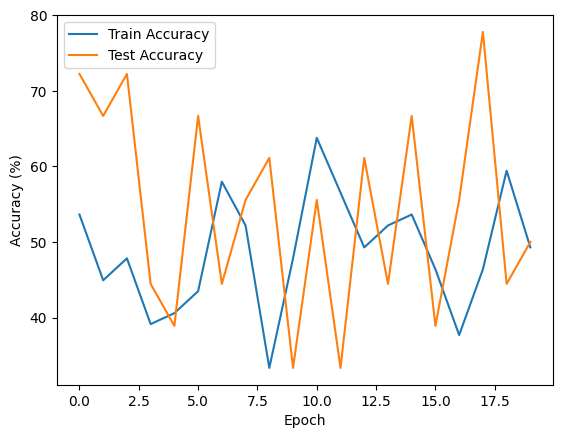

In [63]:
# Plotting Accuracy
plt.figure()
plt.plot(range(epochs), bert_trainer.train_acc_list, label='Train Accuracy')
plt.plot(range(epochs), bert_trainer.test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

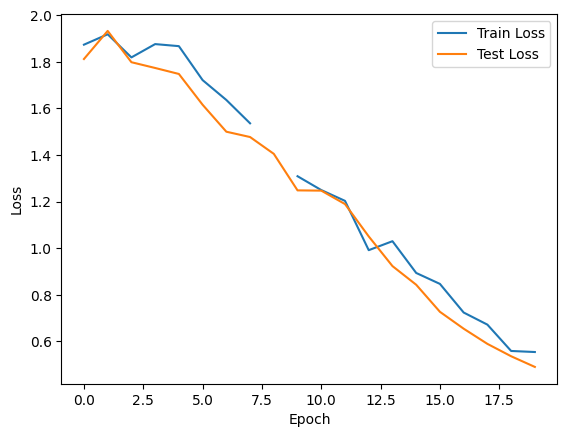

In [64]:
# Plotting Loss
plt.figure()
plt.plot(range(epochs), bert_trainer.train_loss_list, label='Train Loss')
plt.plot(range(epochs), bert_trainer.test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()